# Find Closest Value in BST

Write a function that takes in a **Binary Search Tree (BST)** and a **target integer** value and returns the **closest value** to that target value contained in the BST.

You can assume that there will only be one closest value.

Each **BST** node has an integer **value**, a **left** child node, and a **right** child node. A node is said to be a valid **BST** node if and only if it satisfies the BST property:

- its **value** is strictly greater than the values of every onde to its left;
- its **value** is less than or equal to the values of every node to is rights;
- its children nodes are either valid **BST** nodes themselves or **None**/**null**.

Sample Input

```python
 tree =   10
       /     \
      5       15
    /   \   /   \
   2    5  13    22
  /          \
 1           14

 target = 12
```

Sample output

```python
13
```

**Hint 1**

Try traversing the BST node by node, all the while keeping track of the node with the value closest to the target value. Calculating the absolute value of the difference between a node's value and the target value should allow you to check if that node is closer than the current closest one.

**Hint 2**

Make use of the BST property to determine what side of any given node has values close to the target value and is therefore worth exploring.

**Hint 3**

What are the advantages and disadvantages of solving this problem iteratively as opposed to recursively?

**Optimal Space & Time Complexity**

- Average: O(log(N)) time | O(1) space.
  - where n is the number of nodes in the BST.
- Worst: O(n) time | O(1) space
  - where n is the number of nodes in the BST.

# Classes definitions

In [1]:
%%file binarysearchtree.py
import plotly.graph_objs as go

class Node:
    """
    A class representing a node in a binary search tree.

    Attributes:
    - value: the value of the node
    - left_child: the left child of the node
    - right_child: the right child of the node
    """

    def __init__(self, value):
        """
        Initializes a new instance of the Node class.

        Args:
        - value: the value of the node
        """
        self.value = value
        self.left_child = None
        self.right_child = None


class BST:
    """
    A class representing a binary search tree.

    Attributes:
    - root: the root node of the tree
    """

    def __init__(self):
        """
        Initializes a new instance of the BST class.
        """
        self.root = None

    def add(self, value):
        """
        Adds a new node with the given value to the tree.

        Args:
        - value: the value of the node to add
        """
        if self.root is None:
            # The root does exist yet, create it
            self.root = Node(value)
        else:
            # Find the right place and insert new value
            self._add_recursive(self.root, value)

    def _add_recursive(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the correct position to add the new node.

        Args:
        - current_node: the current node to traverse
        - value: the value of the node to add
        """
        if value <= current_node.value:
            # Go to the left
            if current_node.left_child is None:
                current_node.left_child = Node(value)
            else:
                self._add_recursive(current_node.left_child, value)
        else:
            # Go to the right
            if current_node.right_child is None:
                current_node.right_child = Node(value)
            else:
                self._add_recursive(current_node.right_child, value)

    def _contains(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the node with the given value.

        Args:
        - current_node: the current node to traverse
        - value: the value to search for

        Returns:
        - True if a node with the given value is found, False otherwise
        """
        if current_node is None:
            return False
        if current_node.value == value:
            return True
        if value < current_node.value:
            return self._contains(current_node.left_child, value)
        return self._contains(current_node.right_child, value)

    def contains(self, value):
        """
        Checks whether a node with the given value is present in the tree.

        Args:
        - value: the value to search for

        Returns:
        - True if a node with the given value is found, False otherwise
        """
        return self._contains(self.root, value)

    def plot(self):
        """
        Plots the binary search tree using Plotly.
        """
        if self.root is None:
            print("The tree is empty!")
            return

        # Initialize lists for coordinates and connections
        node_coords = []
        lines = []

        # Helper function to traverse the tree and fill the coordinate and connection lists
        def _plot_recursive(node, x, y, offset):
            if node is not None:
                node_coords.append((x, y, node.value))
                if node.left_child is not None:
                    new_x = x - offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.left_child, new_x, new_y, offset / 2)
                if node.right_child is not None:
                    new_x = x + offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.right_child, new_x, new_y, offset / 2)

        # Traverse the tree starting from the root node
        _plot_recursive(self.root, x=0, y=0, offset=0.5)

        # Create a scatter plot for the nodes
        node_trace = go.Scatter(x=[x for x, y, _ in node_coords],
                                y=[y for _, y, _ in node_coords],
                                text=[str(val) for _, _, val in node_coords],
                                mode='markers+text',
                                textposition='top center',
                                marker=dict(symbol='circle',
                                            size=20,
                                            color='darkblue'))

        # Create a scatter plot for the connections between nodes
        line_trace = go.Scatter(x=sum([[x1, x2, None] for x1, y1, x2, y2 in lines], []),
                                y=sum([[y1, y2, None] for x1, y1, x2, y2 in lines], []),
                                mode='lines',
                                line=dict(color='black'))

        # Combine the two scatter plots
        layout = go.Layout(title='',
                           xaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           yaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           showlegend=False)

        fig = go.Figure(data=[node_trace, line_trace], layout=layout)
        fig.show()

Writing binarysearchtree.py


In [2]:
%run -i binarysearchtree.py

In [3]:
from binarysearchtree import *
# Example usage:
bst = BST()
for value in [5, 3, 1, 0, 2, 4, 7, 6, 8]:
    bst.add(value)
bst.plot()

In [4]:
%%file closestvalue.py
import pytest
from binarysearchtree import *

def findClosestValue(tree:BST, target):
    """
    Finds the value in a binary search tree that is closest to the given target value.

    This function begins the search for the closest value from the root of the binary search tree.
    It works by sequentialy exploring the tree, narrowing down the search based on the target value
    and the current node's value. The closest value is constantly updated throughout the search process.
    If it ever findd the target in the tree, it will be returned immediately.

    Parameters:
    tree (BinarySearchTree): The binary search tree object in which to find the closest value.
                             It is expected to have a 'root' attribute that points to the root node of the tree.
                             If it doesn't, an ValueError exception will be thrown.
    target (int): The target value for which the closest value in the binary search tree is sought.

    Returns:
    int: The value in the binary search tree that is closest to the target value.
    """

    if (tree.root == None):
        raise ValueError("Empty tree!")

    actualNode = tree.root
    diff = actualNode.value - target
    error = abs(diff)
    winner = actualNode.value

    #if we find the target value we can already stop
    while(error!=0):

      if diff > 0:
        actualNode = actualNode.left_child
      else:
        actualNode = actualNode.right_child

      if actualNode is None: break;

      diff = actualNode.value - target
      error = abs(diff)
      if error < abs(winner-target):
        winner = actualNode.value

    return winner


@pytest.fixture(scope="session")
def data():

    array = [[10, 5, 15, 13, 22, 14, 2, 5, 1],
             [100,5,502,204,55000,1001,4500,203,205,207,
              206,208,2,15,5,22,57,60,1,3,-51,1,1,1,1,1,-403]
             ]
    return array

def test_1(data):
    bst = BST()
    for value in data[0]:
      bst.add(value)
    assert findClosestValue(bst, 12) == 13

def test_2(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 100) == 100

def test_3(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 208) == 208

def test_4(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 4500) == 4500

def test_5(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 4501) == 4500

def test_6(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, -70) == -51

def test_7(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 2000) == 1001

def test_8(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 6) == 5

def test_9(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 30000) == 55000

def test_10(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, -1) == 1

def test_11(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 29751) == 55000

def test_12(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findClosestValue(bst, 29749) == 4500

Writing closestvalue.py


In [5]:
!pytest closestvalue.py -vv

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.4.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 12 items                                                                                 

closestvalue.py::test_1 PASSED                                                               [  8%]
closestvalue.py::test_2 PASSED                                                               [ 16%]
closestvalue.py::test_3 PASSED                                                               [ 25%]
closestvalue.py::test_4 PASSED                                                               [ 33%]
closestvalue.py::test_5 PASSED                                                               [ 41%]
closestvalue.py::test_6 PASSED                                                               [ 50%]
closestvalue.py::test_7 PASSED                        

## Computational Complexity Analysis

### Time Complexity

Analysing how many times each part of the function's body will be executed, we
would come to something like the following:
```python
def findClosestValue(tree:BST, target):
  if (tree.root == None):                             #1
          raise ValueError("Empty tree!")             #1
  
      actualNode = tree.root                          #1
      diff = actualNode.value - target                #1
      error = abs(diff)                               #1
      winner = actualNode.value                       #1
  
      #if we find the target value we can already stop
      while(error!=0):                                #X
        
        if diff > 0:                                  #X
          actualNode = actualNode.left_child          #X
        else:                                         #X
          actualNode = actualNode.right_child         #X
        
        if actualNode is None: break;                 #X
  
        diff = actualNode.value - target              #X
        error = abs(diff)                             #X
        if error < abs(winner-target):                #X
          winner = actualNode.value                   #X
  
      return winner                                   #1
```

Where X, as the order of searches, isn't trivially defined. We can consider, as
we only search in one of a node's branches, that the worst case will be proportional to the height of the tree. For a completely unbalanced tree (e.g, a BST that added numbers in a ascending/descending order) it would be it's height — O(N), while for a balanced tree it would be O(log(N)).

In [6]:
import itertools as it
import random
import time
from closestvalue import *

def createExampleData(_total, n):
  '''Creates a random list `total` unique lists with `n+1` unique values.
  It is intended for the tree to be built with the first n values and the last
  one be used as the target (it will never have the case where we find the value
  in the tree, sadly).
  there's a max of 2^(n-1) trees to be returned
  '''
  #generating all permutations with it.permutations really sucks (always run n! times)
  #return random.sample(list(it.permutations(range(0, n+1), n+1)), total)
  total = min(2**(n-1), _total)
  result = []
  pValues = range(0, n+1)
  while (len(result) < total):
    temp = random.sample(pValues, k=n+1)
    if not (temp in result):
      result.append(temp)
  return result

def fixed_N_data(n, maxTrees, tries):
  '''Creates a list of time measurements for the algorithm using up to `maxTrees`
  different trees with `n` nodes. The timings are obtained each by taking the
  minimum time measured from `tries` tries from each tree.

  While the timings from a specific tree come from the minimum time from all
  tries, DO NOT interpret the minimum of the list returned by this function as
  a "less offset-ed from the real" result, specially if you want to analyze the
  worst case time complexity (different trees of the same size don't necessarily
  take the same time).

  If it doesnt sound clear, consider contacting me (you prolly had accessed my
  github to be able to see this, but it is @Marcos7765 there).
  '''
  results = []
  total = min(2**(n-1), maxTrees)
  for data in createExampleData(total, n):
    tree = BST()
    for value in data[:-1]:
      tree.add(value)
    best = float('inf')
    for j in range(0, tries):
      start = time.time()
      findClosestValue(tree,data[-1])
      end = time.time()
      if (end-start < best):
        best = end-start
    results.append(best)
  return results


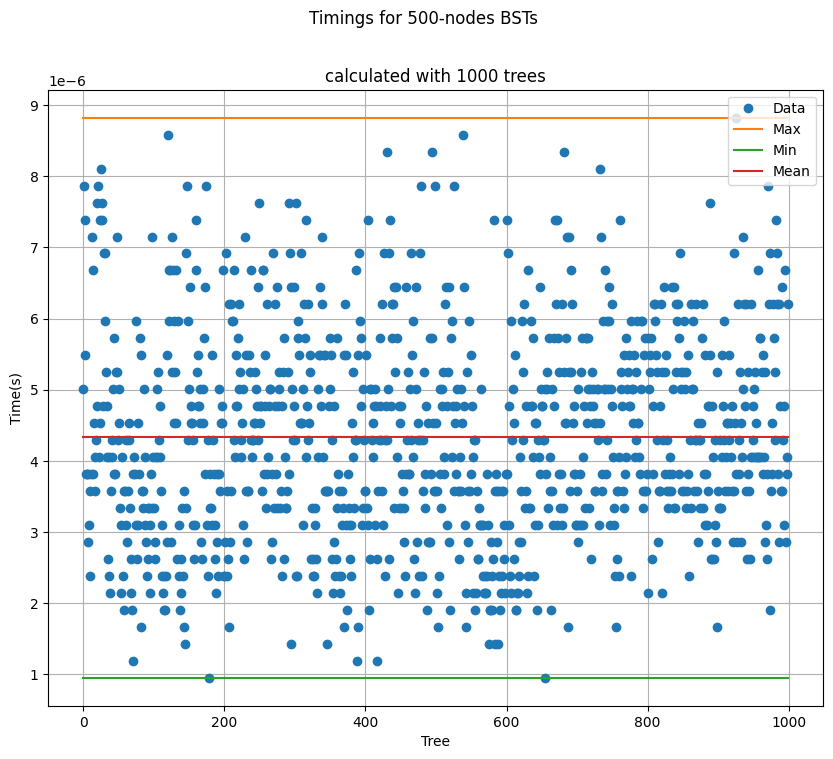

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fixed(n, maxTrees, tries):
  '''Plots `fixed_N_data`, alongside a mean, minimum and maximum lines
  if there are fewer
  '''
  y = fixed_N_data(n, maxTrees, tries)

  plt.figure(figsize=(10,8))
  plt.plot(y, marker='o',linestyle='', label="Data")
  plt.plot([max(y)]*maxTrees, label="Max")
  plt.plot([min(y)]*maxTrees, label="Min")
  plt.plot([np.mean(y)]*maxTrees, label="Mean")
  plt.suptitle(f'Timings for {n}-nodes BSTs')
  plt.title(f'calculated with {len(y)} trees')
  plt.xlabel('Tree')
  plt.ylabel('Time(s)')
  plt.legend(loc="upper right")
  plt.grid(True)
  plt.show()


#just change it to whatever you want to check
plot_fixed(500,1000,30)

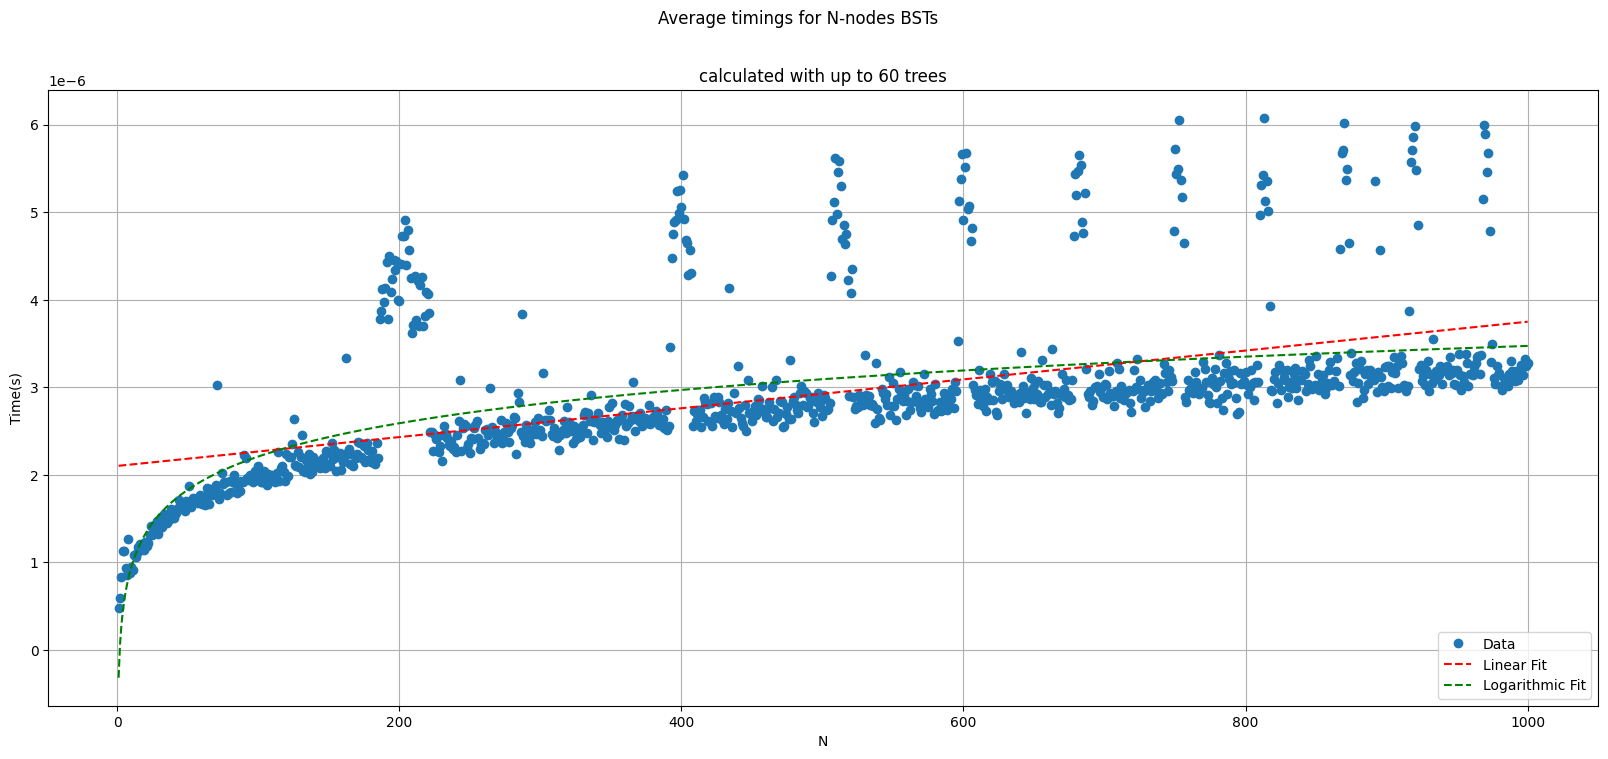

It took 124.85090780258179 seconds to make this plot.


In [10]:
#for some reason, when executing all cells this one sometimes hangs. Just cancel
#it and reexecute the cell if that happens. Right below the graph is how much
#time it took to run it for reference

from scipy.optimize import curve_fit

def plot_timeCurve(Nmax, maxTrees, tries):
  '''Plots a time complexity curve from the average time for up to `maxTrees`
  random trees minimum timings's from `tries` tries. It goes from 1 to Nmax for
  the N axis and is compared to both a linear and a logarithmic curve
  approximation.
  '''
  sizes = [n for n in range(1, Nmax+1)]
  y = []
  for n in sizes:
    y.append(np.mean(fixed_N_data(n, maxTrees, tries)))

  def linear_model(x, a, b):
    return a * x + b

  def logarithmic_model(x, a, b):
    return a * np.log(x) + b

  popt_linear, _ = curve_fit(linear_model, sizes, y)
  popt_logarithmic, _ = curve_fit(logarithmic_model, sizes, y)

  plt.figure(figsize=(20,8))
  plt.plot(sizes, y, marker='o',linestyle='', label="Data")
  plt.plot(sizes, [linear_model(a, *popt_linear) for a in sizes], 'r--',
           label='Linear Fit')
  plt.plot(sizes, [logarithmic_model(a, *popt_logarithmic) for a in sizes],
           'g--', label='Logarithmic Fit')
  plt.suptitle(f'Average timings for N-nodes BSTs')
  plt.title(f'calculated with up to {maxTrees} trees')
  plt.xlabel('N')
  plt.ylabel('Time(s)')
  plt.legend(loc="lower right")
  plt.grid(True)
  plt.show()


#this one takes a bunch of time. the last two arguments help to reduce outliers,
#the first making the average more representative of all trees while the latter
#reducing the influence from factors external from the code
a = time.time()
plot_timeCurve(1000, 60, 30)
b = time.time()
print(f"It took {b-a} seconds to make this plot.")

### Space Complexity
Simply counting the variables we can see that we only keep `actualNode`, `diff`,
`error` and `winner` at all times (after their initial usage, of course), independently of the number of nodes in the tree. That would give us a O(1) space complexity for any type of tree.

> **Hint 3**
>
>What are the advantages and disadvantages of solving this problem iteratively as opposed to recursively?

Here is where i think Hint 3 was destined to. In a recursive function, without assuming that it is tail-recursive and that Python can do a Tail Call optimization$^1$ (which it can't anyways, but could be implemented$^2$), there would be a new stack frame for every recursive call, making it the same order as the time complexity.

Interesting links for the number signalled parts:
1. [Tail Recursion Explained - Computerphile](https://www.youtube.com/watch?v=_JtPhF8MshA)
2. [Python is the Haskell You Never Knew You Had: Tail Call Optimization](https://sagnibak.github.io/blog/python-is-haskell-tail-recursion/)